In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("location.csv")

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [5]:
df=df.dropna(subset="tweet_location")

In [6]:
df['cleaned_tweet_location']=df['tweet_location'].str.lower().str.strip()

In [7]:
df['cleaned_tweet_location'].value_counts()

cleaned_tweet_location
boston, ma                       166
new york, ny                     164
washington, dc                   163
new york                         150
usa                              132
                                ... 
grand rapids,mi & orlando, fl      1
www.twitch.tv/sovindictive         1
phoenix, arizona                   1
milwaukee wi                       1
nigeria,lagos                      1
Name: count, Length: 2828, dtype: int64

In [10]:
import regex as re

def clean(text):
    j=re.sub(r'[^a-zA-Z\s]'," ", str(text))
    j=re.sub(r'http\S+|https\S+|www\S+'," ",j)
    #j=" ".join(word for word in j.split() if word not in sw)
    j=j.lower()
    return j

In [11]:
df['cleaned_tweet_location'].apply(clean)

2               lets play
6        san francisco ca
7             los angeles
8               san diego
9             los angeles
               ...       
14633         los angeles
14636               texas
14637       nigeria lagos
14638          new jersey
14639          dallas  tx
Name: cleaned_tweet_location, Length: 9907, dtype: object

In [12]:
top_locations = df['cleaned_tweet_location'].value_counts().head(10)


In [13]:
top_locations

cleaned_tweet_location
boston, ma           166
new york, ny         164
washington, dc       163
new york             150
usa                  132
new york city        127
nyc                  110
chicago              109
los angeles, ca      100
san francisco, ca     97
Name: count, dtype: int64

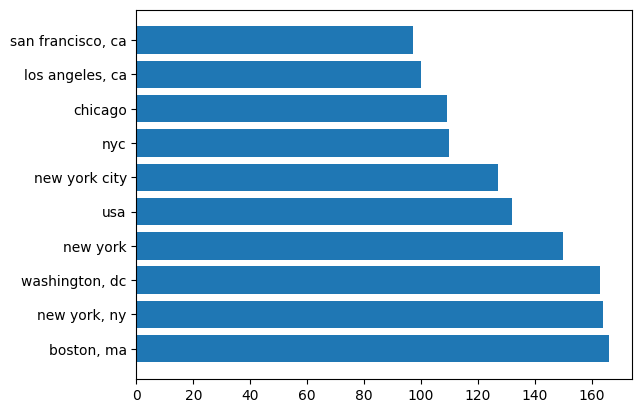

In [16]:
import matplotlib.pyplot as plt
plt.barh(top_locations.index,top_locations.values)

plt.show()